# Full Implementation Code of XGBoost Regressor

In [ ]:
pip install xgboost

Mean Squared Error (MSE): 395.11
R² Score: 0.97
Feature_1: 0.0693
Feature_2: 0.4165
Feature_3: 0.0771
Feature_4: 0.3916
Feature_5: 0.0455


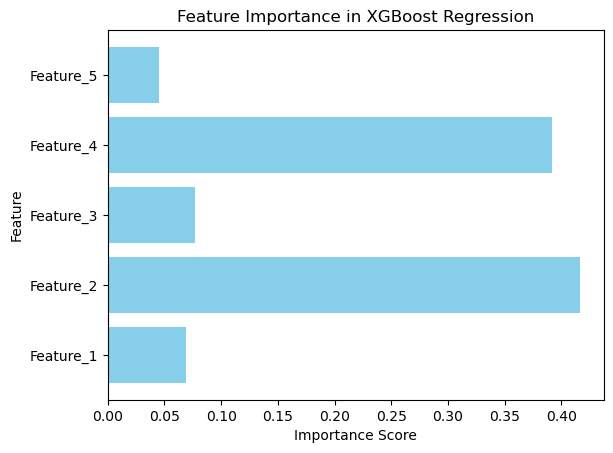

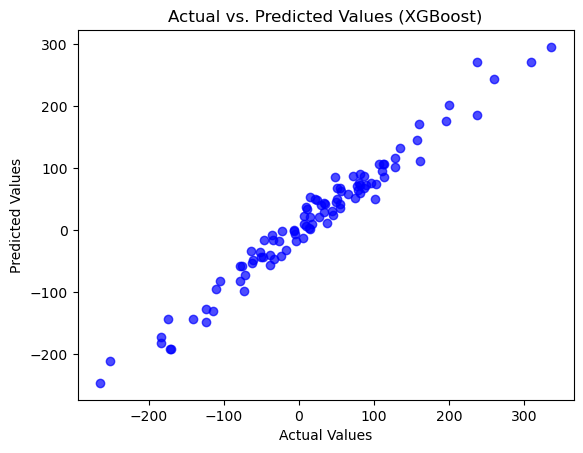

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
X, y = make_regression(n_samples=500, n_features=5, noise=0.2, random_state=42)

# Convert to DataFrame for better visualization
data = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
data['Target'] = y

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4,
                             subsample=0.8, colsample_bytree=0.8, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importance
feature_importance = xgb_model.feature_importances_
for i, importance in enumerate(feature_importance):
    print(f"Feature_{i+1}: {importance:.4f}")

# Plot Feature Importance
plt.barh([f'Feature_{i+1}' for i in range(len(feature_importance))], feature_importance, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in XGBoost Regression")
plt.show()

# Scatter plot for Actual vs. Predicted Values
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (XGBoost)")
plt.show()
